# Homework 6, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

## Do your importing and your setup

In [2]:
import pandas as pd

In [3]:
#!pip install openpyxl

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [4]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx", nrows = 30000)

In [5]:
df.head(5)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [6]:
df.shape #81,937 rows originally, now 30,000

(30000, 15)

In [7]:
df.dtypes

Owner Zip Code                     int64
Animal Name                       object
Animal Gender                     object
Primary Breed                     object
Secondary Breed                   object
Animal Dominant Color             object
Animal Secondary Color            object
Animal Third Color                object
Animal Birth              datetime64[ns]
Spayed or Neut                    object
Guard or Trained                  object
Vaccinated                        object
Application Date          datetime64[ns]
License Issued Date       datetime64[ns]
License Expired Date      datetime64[ns]
dtype: object

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

*Each row is a list of all dogs licensed in New York City as of 2016. "Animal name" is the name of the pet and "Primary Breed" is the breed.*

# Your thoughts

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

## My questions:

* What is the most popular dog name?
* What is the most popular dog in each borough or zip code?
* What percentage of dogs are vaccinated and spayed/neutered?
* Who is the oldest dog in New York City?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [8]:
df['Primary Breed'].value_counts().head(10)

Unknown                                 4777
Yorkshire Terrier                       1882
Shih Tzu                                1760
Chihuahua                               1535
Maltese                                 1133
Labrador Retriever                      1074
American Pit Bull Terrier/Pit Bull       780
Labrador Retriever Crossbreed            738
American Pit Bull Mix / Pit Bull Mix     722
Jack Russell Terrier                     553
Name: Primary Breed, dtype: int64

<AxesSubplot:>

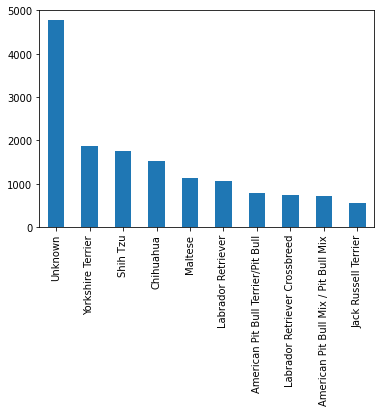

In [9]:
df['Primary Breed'].value_counts().head(10).plot(kind='bar')

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

<AxesSubplot:>

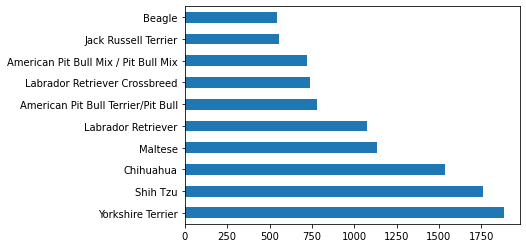

In [10]:
df_all_known = df[df['Primary Breed'] != "Unknown"]

df_all_known['Primary Breed'].value_counts().head(10).plot(kind="barh")

## What are the most popular dog names?

In [11]:
df['Animal Name'].value_counts().head(12)
#Max, Bella, Charlie, Lola, Rocky, Lucy, Coco, Buddy, lucky, and Daisy

UNKNOWN    203
Max        202
Unknown    197
Bella      193
Charlie    172
Lola       146
Rocky      140
Lucy       128
Coco       114
Buddy      113
Lucky      106
Daisy       90
Name: Animal Name, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [12]:
df[df['Animal Name'] == 'Sharon'].count() #No Sharons :()

Owner Zip Code            0
Animal Name               0
Animal Gender             0
Primary Breed             0
Secondary Breed           0
Animal Dominant Color     0
Animal Secondary Color    0
Animal Third Color        0
Animal Birth              0
Spayed or Neut            0
Guard or Trained          0
Vaccinated                0
Application Date          0
License Issued Date       0
License Expired Date      0
dtype: int64

In [13]:
df[df['Animal Name'] == 'Max'].count() #202 Maxes

Owner Zip Code            202
Animal Name               202
Animal Gender             202
Primary Breed             202
Secondary Breed            33
Animal Dominant Color     202
Animal Secondary Color    140
Animal Third Color         46
Animal Birth              202
Spayed or Neut            202
Guard or Trained          136
Vaccinated                202
Application Date          202
License Issued Date       202
License Expired Date      202
dtype: int64

In [14]:
df[df['Animal Name'] == 'Maxwell'].count() #11 Maxwells

Owner Zip Code            11
Animal Name               11
Animal Gender             11
Primary Breed             11
Secondary Breed            2
Animal Dominant Color     11
Animal Secondary Color     8
Animal Third Color         4
Animal Birth              11
Spayed or Neut            11
Guard or Trained           6
Vaccinated                11
Application Date          11
License Issued Date       11
License Expired Date      11
dtype: int64

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [15]:
df['Guard or Trained'].value_counts(normalize=True) #0.0857% of dogs are guard dogs

No     0.999143
Yes    0.000857
Name: Guard or Trained, dtype: float64

## What are the actual numbers?

In [16]:
df['Guard or Trained'].value_counts() #17 dogs are guard dogs

No     19809
Yes       17
Name: Guard or Trained, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [17]:
df['Guard or Trained'].head()

0     No
1     No
2    NaN
3     No
4    NaN
Name: Guard or Trained, dtype: object

In [18]:
df['Guard or Trained'].value_counts(dropna = False)

No     19809
NaN    10174
Yes       17
Name: Guard or Trained, dtype: int64

## Fill in all of those empty "Guard or Trained" columns with "No"

Then check your result with another `.value_counts()`

In [19]:
import numpy as np

df['Guard or Trained'].replace(np.nan, "No").value_counts()

No     29983
Yes       17
Name: Guard or Trained, dtype: int64

## What are the top dog breeds for guard dogs? 

In [20]:
guard_dogs = df[df['Guard or Trained'] == "Yes"]
guard_dogs['Primary Breed'].value_counts()

Unknown                       5
German Shepherd Dog           3
Schnauzer, Miniature          1
German Shepherd Crossbreed    1
Yorkshire Terrier             1
Rottweiler                    1
Labrador Retriever            1
Doberman Pinscher             1
Golden Retriever              1
Shih Tzu                      1
Poodle, Standard              1
Name: Primary Breed, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [21]:
df['Year'] = df['Animal Birth'].apply(lambda birth: birth.year)

df

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,11372,Bella,F,Unknown,Goldendoodle,CREAM,WHITE,TAN,2010-07-01,Yes,No,Yes,2015-08-22 19:00:39.303,2015-08-22,2016-09-27,2010
29996,11417,Sadie,F,"Schnauzer, Miniature",NaN,BLACK,BROWN,NaN,2010-05-01,Yes,No,Yes,2015-08-22 19:03:08.003,2015-08-22,2016-09-28,2010
29997,11228,unknown,M,Pomeranian,NaN,Tan,White,NaN,2014-03-01,Yes,NaN,Yes,2015-08-22 19:04:56.720,2015-08-22,2016-08-22,2014
29998,11217,daisy,F,Unknown,NaN,GRAY,WHITE,BLACK,2009-01-01,Yes,No,Yes,2015-08-22 19:14:30.177,2015-08-22,2016-08-05,2009


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [22]:
df['Age'] = 2016-df['Year']
df

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year,Age
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,9
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,3
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,2
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,8
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,11372,Bella,F,Unknown,Goldendoodle,CREAM,WHITE,TAN,2010-07-01,Yes,No,Yes,2015-08-22 19:00:39.303,2015-08-22,2016-09-27,2010,6
29996,11417,Sadie,F,"Schnauzer, Miniature",NaN,BLACK,BROWN,NaN,2010-05-01,Yes,No,Yes,2015-08-22 19:03:08.003,2015-08-22,2016-09-28,2010,6
29997,11228,unknown,M,Pomeranian,NaN,Tan,White,NaN,2014-03-01,Yes,NaN,Yes,2015-08-22 19:04:56.720,2015-08-22,2016-08-22,2014,2
29998,11217,daisy,F,Unknown,NaN,GRAY,WHITE,BLACK,2009-01-01,Yes,No,Yes,2015-08-22 19:14:30.177,2015-08-22,2016-08-05,2009,7


<AxesSubplot:>

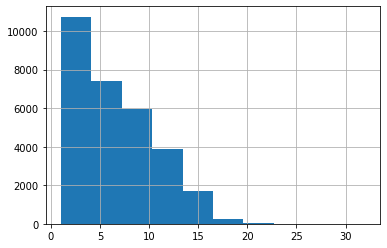

In [23]:
df.Age.hist()

In [24]:
df.Age.mean()

6.712433333333333

# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [25]:
zips = pd.read_csv("zipcodes-neighborhoods.csv")
zips

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx
...,...,...,...
173,South Shore,10312,Staten Island
174,Stapleton and St. George,10301,Staten Island
175,Stapleton and St. George,10304,Staten Island
176,Stapleton and St. George,10305,Staten Island


In [26]:
df = df.merge(zips, left_on="Owner Zip Code", right_on="zip")
df

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year,Age,neighborhood,zip,borough
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,9,Upper West Side,10024,Manhattan
1,10024,Louie,M,Unknown,Coonhound,Black,White,Brown,2008-05-01,Yes,No,Yes,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,8,Upper West Side,10024,Manhattan
2,10024,Tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,No,Yes,2014-09-16 10:22:07.867,2014-09-16,2017-10-11,2011,5,Upper West Side,10024,Manhattan
3,10024,Poppett,F,"Dachshund, Long Haired Miniature",NaN,Black,Brown,Silver,2011-02-01,Yes,NaN,Yes,2014-09-18 16:25:57.323,2014-09-18,2019-09-18,2011,5,Upper West Side,10024,Manhattan
4,10024,Harlen,M,Unknown,Plott Hound,BLACK,TAN,BROWN,2007-05-01,Yes,No,Yes,2014-09-25 17:11:20.713,2014-09-25,2016-08-20,2007,9,Upper West Side,10024,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29568,11436,Jack,M,Jack Russell Terrier,NaN,WHITE,BLACK,BROWN,2010-01-01,Yes,No,Yes,2015-08-09 17:43:18.710,2015-08-09,2016-08-10,2010,6,Jamaica,11436,Queens
29569,11436,ROXY,F,Unknown,\HAR PEI X,BLACK,NaN,NaN,2003-01-01,Yes,No,Yes,2015-08-12 06:37:28.877,2015-08-12,2017-08-30,2003,13,Jamaica,11436,Queens
29570,11436,marco,M,Yorkshire Terrier,NaN,BROWN,GRAY,NaN,2009-01-01,No,No,Yes,2015-08-13 10:20:46.697,2015-08-13,2016-08-20,2009,7,Jamaica,11436,Queens
29571,11436,Maximilian,M,Shih Tzu,NaN,WHITE,TAN,NaN,2004-01-01,Yes,No,Yes,2015-08-19 11:49:32.743,2015-08-19,2016-08-30,2004,12,Jamaica,11436,Queens


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [27]:
df[df.borough == "Bronx"]['Animal Name'].value_counts().head(6)

Bella       22
Max         21
Rocky       20
Unknown     16
Lucky       15
Princess    15
Name: Animal Name, dtype: int64

In [28]:
df[df.borough == "Brooklyn"]['Animal Name'].value_counts().head(8)

Unknown    97
Max        46
Bella      45
unknown    45
UNKNOWN    45
Charlie    42
Rocky      36
Lucky      32
Name: Animal Name, dtype: int64

In [29]:
df[df.neighborhood == "Upper East Side"]['Animal Name'].value_counts().head(6)

Charlie    19
Bella      12
NO NAME    11
Lucy       10
Lola       10
Buddy       9
Name: Animal Name, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [30]:
df_all_known = df[df['Primary Breed']!="Unknown"]

df2 = df_all_known.groupby('neighborhood')['Primary Breed'].value_counts().groupby(level=0).head(1)

df2

neighborhood                   Primary Breed                       
Borough Park                   Yorkshire Terrier                        49
Bronx Park and Fordham         Yorkshire Terrier                        39
Bushwick and Williamsburg      Yorkshire Terrier                        47
Canarsie and Flatlands         Shih Tzu                                 56
Central Bronx                  Yorkshire Terrier                        29
Central Brooklyn               Shih Tzu                                 52
Central Harlem                 Chihuahua                                48
Central Queens                 Yorkshire Terrier                        34
Chelsea and Clinton            Chihuahua                                80
East Harlem                    Yorkshire Terrier                        44
East New York and New Lots     Yorkshire Terrier                        25
Flatbush                       Shih Tzu                                 38
Gramercy Park and Murray Hill  Y

## What breed of dogs are the least likely to be spayed? Male or female?

In [31]:
df.groupby('Animal Gender')['Spayed or Neut'].value_counts()

Animal Gender  Spayed or Neut
               Yes                   3
F              Yes               11620
               No                 1930
M              Yes               12677
               No                 3343
Name: Spayed or Neut, dtype: int64

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [32]:
#https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/

df['monochrome'] = np.where((df['Animal Dominant Color'] == "Brown") | (df['Animal Dominant Color'] == "Grey") | (df['Animal Dominant Color'] == "White"), True, False)

df

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,...,Vaccinated,Application Date,License Issued Date,License Expired Date,Year,Age,neighborhood,zip,borough,monochrome
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,...,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,9,Upper West Side,10024,Manhattan,False
1,10024,Louie,M,Unknown,Coonhound,Black,White,Brown,2008-05-01,Yes,...,Yes,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,8,Upper West Side,10024,Manhattan,False
2,10024,Tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,...,Yes,2014-09-16 10:22:07.867,2014-09-16,2017-10-11,2011,5,Upper West Side,10024,Manhattan,False
3,10024,Poppett,F,"Dachshund, Long Haired Miniature",NaN,Black,Brown,Silver,2011-02-01,Yes,...,Yes,2014-09-18 16:25:57.323,2014-09-18,2019-09-18,2011,5,Upper West Side,10024,Manhattan,False
4,10024,Harlen,M,Unknown,Plott Hound,BLACK,TAN,BROWN,2007-05-01,Yes,...,Yes,2014-09-25 17:11:20.713,2014-09-25,2016-08-20,2007,9,Upper West Side,10024,Manhattan,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29568,11436,Jack,M,Jack Russell Terrier,NaN,WHITE,BLACK,BROWN,2010-01-01,Yes,...,Yes,2015-08-09 17:43:18.710,2015-08-09,2016-08-10,2010,6,Jamaica,11436,Queens,False
29569,11436,ROXY,F,Unknown,\HAR PEI X,BLACK,NaN,NaN,2003-01-01,Yes,...,Yes,2015-08-12 06:37:28.877,2015-08-12,2017-08-30,2003,13,Jamaica,11436,Queens,False
29570,11436,marco,M,Yorkshire Terrier,NaN,BROWN,GRAY,NaN,2009-01-01,No,...,Yes,2015-08-13 10:20:46.697,2015-08-13,2016-08-20,2009,7,Jamaica,11436,Queens,False
29571,11436,Maximilian,M,Shih Tzu,NaN,WHITE,TAN,NaN,2004-01-01,Yes,...,Yes,2015-08-19 11:49:32.743,2015-08-19,2016-08-30,2004,12,Jamaica,11436,Queens,False


In [33]:
df.monochrome.value_counts()

False    26016
True      3557
Name: monochrome, dtype: int64

## How many dogs are in each borough? Plot it in a graph.

<AxesSubplot:>

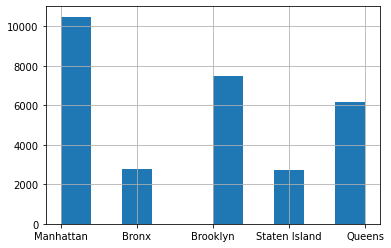

In [34]:
df.borough.hist()

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [35]:
human_pop = pd.read_csv("boro_population.csv")
human_pop

,borough,population,area_sqmi
0,Manhattan,1644518,23
1,Bronx,1455444,42
2,Brooklyn,2636735,71
3,Queens,2339150,109
4,Staten Island,474558,59


In [36]:
#https://stackoverflow.com/questions/20461165/how-to-convert-index-of-a-pandas-dataframe-into-a-column

dog_pop = df.borough.value_counts().to_frame()
dog_pop.reset_index(level=0, inplace=True)

dog_pop.columns = ['borough', 'dog_population']

dog_pop

,borough,dog_population
0,Manhattan,10478
1,Brooklyn,7466
2,Queens,6154
3,Bronx,2748
4,Staten Island,2727


In [37]:
human_pop = human_pop.merge(dog_pop, left_on="borough", right_on="borough")

human_pop

,borough,population,area_sqmi,dog_population
0,Manhattan,1644518,23,10478
1,Bronx,1455444,42,2748
2,Brooklyn,2636735,71,7466
3,Queens,2339150,109,6154
4,Staten Island,474558,59,2727


In [38]:
human_pop['per_cap'] = human_pop['dog_population']/human_pop['population']

human_pop

,borough,population,area_sqmi,dog_population,per_cap
0,Manhattan,1644518,23,10478,0.006371
1,Bronx,1455444,42,2748,0.001888
2,Brooklyn,2636735,71,7466,0.002832
3,Queens,2339150,109,6154,0.002631
4,Staten Island,474558,59,2727,0.005746


## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.

In [45]:
df_all_known = df[df['Primary Breed']!="Unknown"]

df2 = df_all_known.groupby('borough')['Primary Breed'].value_counts().groupby(level=0).head(5)

df2

borough        Primary Breed                     
Bronx          Yorkshire Terrier                     250
               Shih Tzu                              244
               Chihuahua                             208
               American Pit Bull Terrier/Pit Bull    181
               Maltese                               139
Brooklyn       Yorkshire Terrier                     501
               Shih Tzu                              481
               Chihuahua                             391
               Labrador Retriever                    255
               Maltese                               247
Manhattan      Chihuahua                             511
               Yorkshire Terrier                     505
               Shih Tzu                              454
               Labrador Retriever                    422
               Maltese                               332
Queens         Yorkshire Terrier                     434
               Shih Tzu               

In [46]:
df2 = df2.to_frame()
df2

Primary Breed
borough       Primary Breed                                    
Bronx         Yorkshire Terrier                             250
              Shih Tzu                                      244
              Chihuahua                                     208
              American Pit Bull Terrier/Pit Bull            181
              Maltese                                       139
Brooklyn      Yorkshire Terrier                             501
              Shih Tzu                                      481
              Chihuahua                                     391
              Labrador Retriever                            255
              Maltese                                       247
Manhattan     Chihuahua                                     511
              Yorkshire Terrier                             505
              Shih Tzu                                      454
              Labrador Retriever                            422
              Maltese                                       332
Queens        Yorkshire Terrier                             434
              Shih Tzu                                      395
              Chihuahua                                     306
              Maltese                                       305
              Labrador Retriever                            208
Staten Island Yorkshire Terrier                             171
              Shih Tzu                                      165
              Labrador Retriever                            123
              Chihuahua                                     100
              Maltese                                        93

<AxesSubplot:xlabel='Primary Breed'>

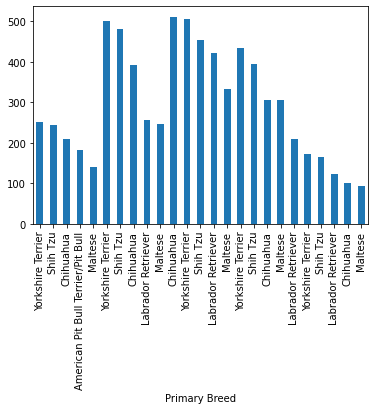

In [52]:
df2['Primary Breed'].plot(kind="bar")

## What percentage of dogs are not guard dogs?

In [53]:
df['Guard or Trained'].value_counts(normalize=True) #99% of dogs are not guard dogs

No     0.999181
Yes    0.000819
Name: Guard or Trained, dtype: float64